In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [24]:
df=pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [25]:
def segment(x):
    if x['Age'] <= 21:
        segment = 'Teen'
    elif (x['Age'] >= 21 and x['Age'] <= 55):
        segment = 'Adult'
    else:
        segment = 'Elderly'
    return segment

In [26]:
df['segment'] = df.apply(lambda x: segment(x), axis=1)
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,segment
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,Adult
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Adult
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,Adult
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,Adult
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,Elderly


In [27]:
gb1 = df.groupby(['segment', 'ProdTaken']).agg({'CustomerID':'nunique'}).reset_index()

gb1

,segment,ProdTaken,CustomerID
0,Adult,0,3579
1,Adult,1,758
2,Elderly,0,341
3,Elderly,1,85
4,Teen,0,48
5,Teen,1,77


In [28]:
gb2 = df.groupby('segment').agg({'CustomerID':'nunique'}).reset_index()

gb2

,segment,CustomerID
0,Adult,4337
1,Elderly,426
2,Teen,125


In [29]:
gb2 = df.groupby('segment').agg({'CustomerID':'nunique'}).reset_index()

gbm = gb1.merge(gb2 , how='inner', on='segment')

gbm.columns = ['segment', 'ProdTaken', 'Pelanggan Ditelfon','Total Pelanggan']

gbm

,segment,ProdTaken,Pelanggan Ditelfon,Total Pelanggan
0,Adult,0,3579,4337
1,Adult,1,758,4337
2,Elderly,0,341,426
3,Elderly,1,85,426
4,Teen,0,48,125
5,Teen,1,77,125


In [30]:
gbm['Rasio'] = 100 * gbm['Pelanggan Ditelfon'] / gbm.groupby('Total Pelanggan')['Pelanggan Ditelfon'].transform('sum')
gbm

,segment,ProdTaken,Pelanggan Ditelfon,Total Pelanggan,Rasio
0,Adult,0,3579,4337,82.522481
1,Adult,1,758,4337,17.477519
2,Elderly,0,341,426,80.046948
3,Elderly,1,85,426,19.953052
4,Teen,0,48,125,38.400000
5,Teen,1,77,125,61.600000


In [31]:
result = gbm[(gbm['ProdTaken']==1)]
result

,segment,ProdTaken,Pelanggan Ditelfon,Total Pelanggan,Rasio
1,Adult,1,758,4337,17.477519
3,Elderly,1,85,426,19.953052
5,Teen,1,77,125,61.600000


<Figure size 1000x1500 with 0 Axes>

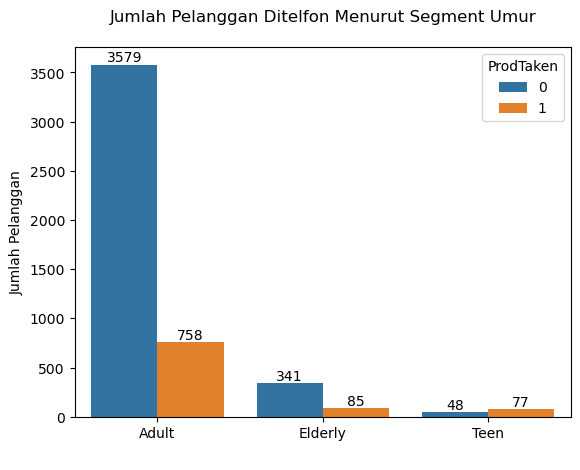

<Figure size 1000x1500 with 0 Axes>

In [32]:
ax = sns.barplot(y='Pelanggan Ditelfon', x='segment', data=gbm, hue='ProdTaken', errwidth=0)

ax.set(xlabel=' ', ylabel='Jumlah Pelanggan', title='Jumlah Pelanggan Ditelfon Menurut Segment Umur\n')

for container in ax.containers:
    ax.bar_label(container)

plt.figure(figsize=(10,15))

<Figure size 1000x1500 with 0 Axes>

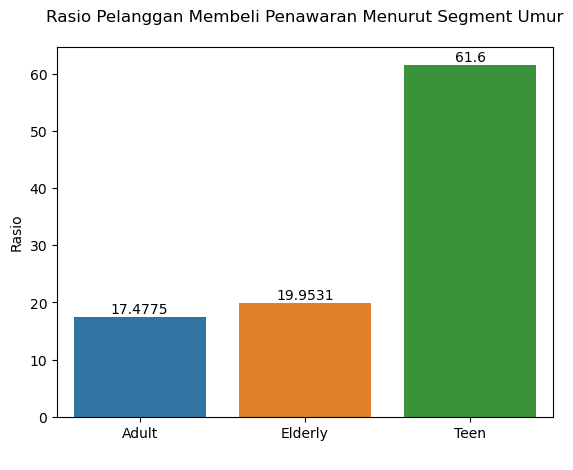

<Figure size 1000x1500 with 0 Axes>

In [33]:
ax2 = sns.barplot(y='Rasio', x='segment', data=result, errwidth=0)

ax2.set(xlabel=' ', ylabel='Rasio', title='Rasio Pelanggan Membeli Penawaran Menurut Segment Umur\n')

for container in ax2.containers:
    ax2.bar_label(container)

plt.figure(figsize=(10,15))

### Business Insights

Dari grafik diatas dapat dilihat bahwa mayoritas pelanggan yang diberikan tawaran dan membeli tawaran holiday package adalah pelanggan dewasa yang berumur 21 - 55 tahun, sedangkan yang diberikan tawaran paling sedikit adalah pelanggan remaja yang berumur dibawah 21 tahun. Namun dari segi efektifitas, datanya berkebalikan dimana sangat banyak pelanggan dewasa yang menolak tawaran dibandingkan menerima tawaran dilihat dari rasio pelanggan menerima tawaran yaitu senilai **17.47%**, sebaliknya pelanggan usia remaja memiliki rasio terima tawaran yang besar senilai **61.6%** yang berarti pelanggan remaja lebih banyak menerima tawaran dibanding menolak tawaran dari telfon yang telah dilakukan.

### Business Recommendations

Dari data diatas dilihat penawaran kepada pelanggan usia remaja memiliki rasio pembelian yang tinggi, maka disarankan kepada tim Marketing untuk menambah frekuensi penawaran kepada pelanggan usia remaja dan mengurangi frekuensi penawaran kepada pelanggan usia dewasa untuk meningkatkan efektifitas pemasaran untuk produk holiday package.

In [38]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
segment                       0
dtype: int64

In [48]:
gb3 = df.groupby(['Occupation' , 'ProdTaken']).agg({'CustomerID':'nunique'}).reset_index()
gb3

,Occupation,ProdTaken,CustomerID
0,Free Lancer,1,2
1,Large Business,0,314
2,Large Business,1,120
3,Salaried,0,1954
4,Salaried,1,414
5,Small Business,0,1700
6,Small Business,1,384


In [50]:
gb4 = df.groupby('Occupation').agg({'CustomerID':'nunique'}).reset_index()

gbm2 = gb3.merge(gb4 , how='left', on='Occupation')

gbm2.columns = ['Occupation', 'ProdTaken', 'Pelanggan Ditelfon','Total Pelanggan']

gbm2

,Occupation,ProdTaken,Pelanggan Ditelfon,Total Pelanggan
0,Free Lancer,1,2,2
1,Large Business,0,314,434
2,Large Business,1,120,434
3,Salaried,0,1954,2368
4,Salaried,1,414,2368
5,Small Business,0,1700,2084
6,Small Business,1,384,2084


In [51]:
gbm2['Rasio'] = 100 * gbm2['Pelanggan Ditelfon'] / gbm2.groupby('Total Pelanggan')['Pelanggan Ditelfon'].transform('sum')
gbm2

,Occupation,ProdTaken,Pelanggan Ditelfon,Total Pelanggan,Rasio
0,Free Lancer,1,2,2,100.000000
1,Large Business,0,314,434,72.350230
2,Large Business,1,120,434,27.649770
3,Salaried,0,1954,2368,82.516892
4,Salaried,1,414,2368,17.483108
5,Small Business,0,1700,2084,81.573896
6,Small Business,1,384,2084,18.426104


In [55]:
result2 = gbm2[(gbm2['ProdTaken']==1)]
result2

,Occupation,ProdTaken,Pelanggan Ditelfon,Total Pelanggan,Rasio
0,Free Lancer,1,2,2,100.000000
2,Large Business,1,120,434,27.649770
4,Salaried,1,414,2368,17.483108
6,Small Business,1,384,2084,18.426104


<Figure size 1000x1500 with 0 Axes>

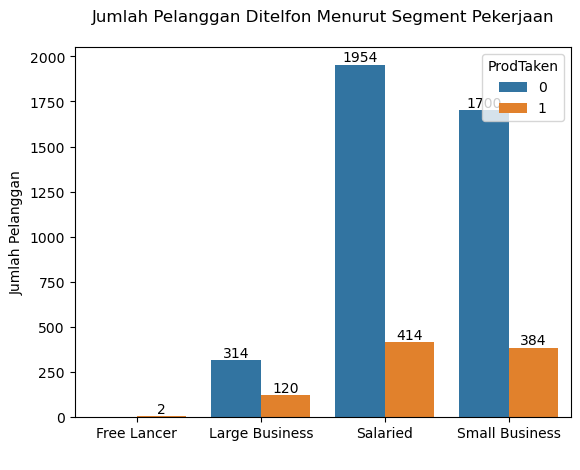

<Figure size 1000x1500 with 0 Axes>

In [56]:
ax3 = sns.barplot(y='Pelanggan Ditelfon', x='Occupation', data=gbm2, hue='ProdTaken', errwidth=0)

ax3.set(xlabel=' ', ylabel='Jumlah Pelanggan', title='Jumlah Pelanggan Ditelfon Menurut Segment Pekerjaan\n')

for container in ax3.containers:
    ax3.bar_label(container)

plt.figure(figsize=(10,15))

<Figure size 1000x1500 with 0 Axes>

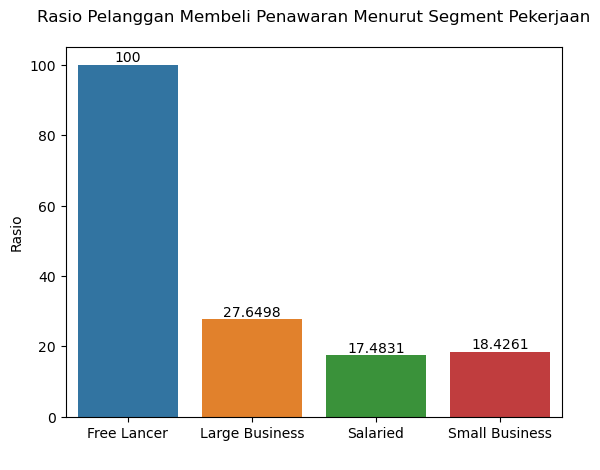

<Figure size 1000x1500 with 0 Axes>

In [57]:
ax4 = sns.barplot(y='Rasio', x='Occupation', data=result2, errwidth=0)

ax4.set(xlabel=' ', ylabel='Rasio', title='Rasio Pelanggan Membeli Penawaran Menurut Segment Pekerjaan\n')

for container in ax4.containers:
    ax4.bar_label(container)

plt.figure(figsize=(10,15))

### Business Insights

Dari grafik diatas dapat dilihat bahwa mayoritas penawaran yang dilakukan untuk holiday package ditujukan kepada pelanggan yang digaji sebanyak **2368 pelanggan** dan pelanggan yang memiliki usaha kecil sebanyak **2084 pelanggan**, sedangkan pelanggan dengan usaha berskala besar hanya sedikit yang diberikan tawaran yaitu sebanyak **434 pelanggan**. Untuk pelanggan freelancer dikarenakan data yang dimiliki masih belum cukup untuk dijadikan acuan karena hanya ada **2 pelanggan** yang diberi tawaran, maka untuk sementara data ini diabaikan. Dari data diatas dapat dilihat rasio pelanggan yang menerima tawaran holiday package. Data menunjukkan bahwa pelanggan yang memiliki bisnis berskala besar memiliki rasio paling tinggi yaitu sebesar **27.64%**, disusul oleh pelanggan berbisnis kecil dengan **18.42%** lalu pelanggan yang digaji sebesar **17.48%**.

### Business Recommendations 

Dari insights yang telah didapatkan dapat disimpulkan bahwa pelanggan dengan bisnis besar memiliki tingkat keefektifan paling tinggi untuk diberikan tawaran holiday package yaitu sebesar **27.64%**, dibandingkan dengan pelanggan yang digaji dan pelanggan berbisnis kecil. Maka disarankan kepada tim marketing untuk menambah frekuensi penawaran kepada pelanggan dengan bisnis besar ketimbang penawaran kepada pelanggan berbisnis kecil dan pelanggan yang digaji untuk meningkatkan efektifitas pemasaran untuk produk holiday package.